In [11]:
import sympy as sp
from sympy.vector import CoordSys3D
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
import matplotlib.animation as animation

sp.init_printing()

from matplotlib import rc
rc('animation', html='jshtml', embed_limit=500)
#animation.

# PART 2: Parallel Transport of Vectors on a 2-Sphere using Python, Matplotlib and 3D Axes

We will describe the surface of a sphere using two coordinates, $\theta$ and $\phi$:

In [12]:
th, ph = sp.symbols('\\theta \\phi', real=True)

These are the well known angles used in spherical coordinates. We can write the cartesian coordinates in terms of these spherical coordinates

In [13]:
x_tp = sp.sin(th) * sp.cos(ph)
y_tp = sp.sin(th) * sp.sin(ph)
z_tp = sp.cos(th)

We have taken $\phi$ to be the angle with the x-axes and $\theta$ the angle with the z-axes.

Lets say that at a point ($\theta$, $\phi$) we have a vector V. And lets write this vector as a sum of the $\theta$ and $\phi$ basis vectors. We call those basis vectors $\vec{\partial}_{\theta}$ and $\vec{\partial}_{\phi}$. We then have:
$$\vec{V} = V_{\theta} \text{ } \vec{\partial}_{\theta} + V_{\phi} \text{ } \vec{\partial}_{\phi}
$$
If we want to plot $\vec{\partial}_{\theta}$ and $\vec{\partial}_{\phi}$ we would need to write it in terms of the cartesian basis vectors. We can do this for $\theta$ by writing:
$$
\vec{\partial}_{\theta} = \frac{\partial x}{\partial \theta} \text{ } \vec{e}_x + 
\frac{\partial y}{\partial \theta} \text{ } \vec{e}_y + 
\frac{\partial z}{\partial \theta} \text{ } \vec{e}_z
$$
And similarly for $\phi$:
$$
\vec{\partial}_{\phi} = 
\frac{\partial x}{\partial \phi} \text{ } \vec{e}_x + 
\frac{\partial y}{\partial \phi} \text{ } \vec{e}_y + 
\frac{\partial z}{\partial \phi} \text{ } \vec{e}_z
$$

We can use sympy to calculate the partial derivatives:

In [14]:
dx_dth = x_tp.diff(th)
dy_dth = y_tp.diff(th)
dz_dth = z_tp.diff(th)
display(dx_dth, dy_dth, dz_dth)

In [15]:
dx_dph = x_tp.diff(ph)
dy_dph = y_tp.diff(ph)
dz_dph = z_tp.diff(ph)
display(dx_dph, dy_dph, dz_dph)

And the length of the basis vectors $\vec{\partial}_{\theta}$ and $\vec{\partial}_{\phi}$ is:

In [16]:
(dx_dth**2 + dy_dth**2 + dz_dth**2).simplify()

In [17]:
(dx_dph**2 + dy_dph**2 + dz_dph**2).simplify()

We are going to visualize the vector $\vec{V}$ on top of the sphere and for this we want to write the vector $\vec{V}$ and its basis vectors $\partial_{\theta}$ and $\partial_{\phi}$ in terms of the cartesian basis x, y, z. We make the following function to do this:

In [18]:
def vectorInCart(comp_th, comp_ph, coord_th, coord_ph):
    # coord_th, coord_ph: these are the coordinates on the sphere. Thus 
    #                     the location of vector space in which we will draw 
    #                     our vector
    th, ph = sp.symbols('\\theta \\phi', real=True)
    x_tp = sp.sin(th) * sp.cos(ph)
    y_tp = sp.sin(th) * sp.sin(ph)
    z_tp = sp.cos(th)

    dx_dth = x_tp.diff(th)
    dy_dth = y_tp.diff(th)
    dz_dth = z_tp.diff(th)

    dx_dph = x_tp.diff(ph)
    dy_dph = y_tp.diff(ph)
    dz_dph = z_tp.diff(ph)

    # We calculate the cartesian coordinates of each position
    x, y, z = x_tp.subs([(th, coord_th), (ph, coord_ph)]), \
            y_tp.subs([(th, coord_th), (ph, coord_ph)]), \
            z_tp.subs([(th, coord_th), (ph, coord_ph)])
    L = {"x": float(x), "y": float(y), "z": float(z)}
    
    # And we calculate the theta and phi basis vectors at 
    # those locations
    dth_x = dx_dth.subs([(th, coord_th), (ph, coord_ph)])
    dth_y = dy_dth.subs([(th, coord_th), (ph, coord_ph)])
    dth_z = dz_dth.subs([(th, coord_th), (ph, coord_ph)])
    B_th = {"x": dth_x, "y": dth_y, "z": dth_z}
    
    dph_x = dx_dph.subs([(th, coord_th), (ph, coord_ph)])
    dph_y = dy_dph.subs([(th, coord_th), (ph, coord_ph)])
    dph_z = dz_dph.subs([(th, coord_th), (ph, coord_ph)])
    B_ph = {"x": dph_x, "y": dph_y, "z": dph_z}
    
    V_x = comp_th * dth_x + comp_ph * dph_x
    V_y = comp_th * dth_y + comp_ph * dph_y
    V_z = comp_th * dth_z + comp_ph * dph_z
    
    V = {"x": float(V_x), "y": float(V_y), "z": float(V_z)}
    
    return L, V, B_th, B_ph

And now we plot a few example vectors (red) and basis vectors at different $\theta$ and $\phi$ coordinates.

{'x': 1.0, 'y': 0.0, 'z': 0.0}
{'x': 0.8660254037844386, 'y': 0.0, 'z': 0.5}
{'x': 0.5, 'y': 0.0, 'z': 0.8660254037844387}


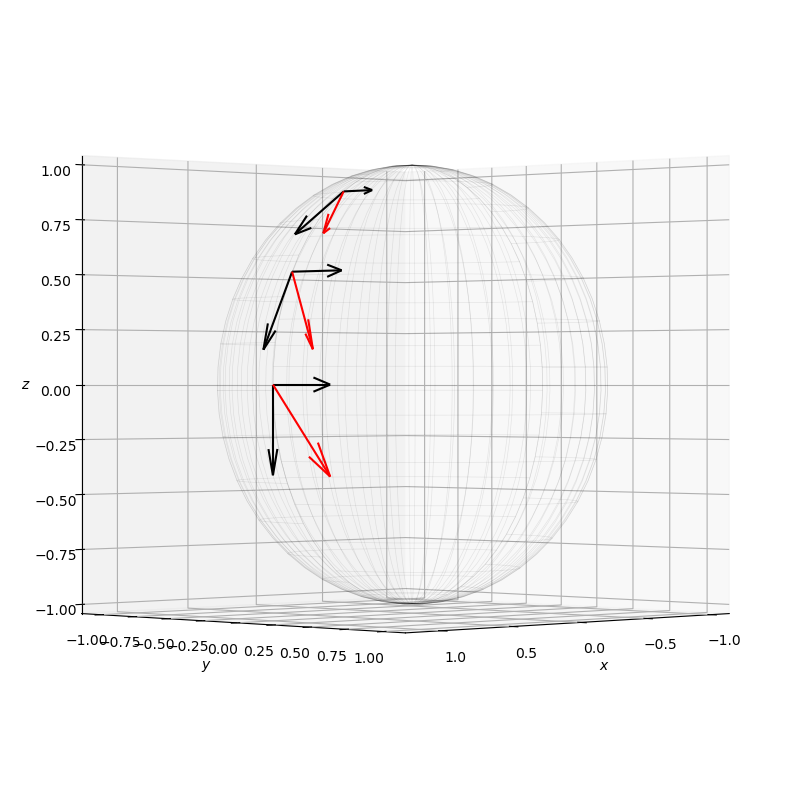

In [19]:
# We add a subplot to the figure which we tell to use the 3d projection 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
# We set the scaling of the axis to equal
ax.set_aspect("equal") 
# Lastly we set the viewing angle from which we want to view our 3d scene.
ax.view_init(elev=0, azim=45, roll=0)

# Using numpy we make a grid that we use to plot the wireframe
theta_w, phi_w =  np.mgrid[0:2*np.pi : 60j ,0:np.pi : 60j]

# We set the radius of the wireframe sphere to 1 and calculate
# the cartesian coordinates
# r_w = 1
x_w = np.sin(theta_w) * np.cos(phi_w) #func_x(r_w, theta_w, phi_w)
y_w = np.sin(theta_w) * np.sin(phi_w) #func_y(r_w, theta_w, phi_w)
z_w = np.cos(theta_w) #func_z(r_w, theta_w, phi_w)

# # We plot the wireframe
ax.plot_wireframe(x_w,y_w,z_w, colors= [0,0,0,0.08], linewidths=[0.5])

plt.xlim(-1.1, 1.2)
plt.ylim(-1.1, 1.1)
ax.set_zlim(-1, 1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

# We will plot the theta and phi basis vectors at three positions
V = [(1/2*sp.pi, 0), (1/3*sp.pi, 0), (1/6*sp.pi, 0)]
for v in V:
    L, V, B_th, B_ph = vectorInCart(1,1, v[0], v[1])
    print(L)
    # We plot the two basis vectors using a quiver
    scale = 0.4
    d_th_arrow = ax.quiver(L["x"], L["y"], L["z"], scale*B_th["x"], scale*B_th["y"], scale*B_th["z"], color="black")
    d_ph_arrow = ax.quiver(L["x"], L["y"], L["z"], scale*B_ph["x"], scale*B_ph["y"], scale*B_ph["z"], color="black")
    d_ph_arrow = ax.quiver(L["x"], L["y"], L["z"], scale*V["x"], scale*V["y"], scale*V["z"], color="red")


And as we saw in the previous blog (LinK) these basis vectors are orthogonal but not orthonormal. Now we can clearly see that the $\phi$ basis vector $\partial_{\phi}$ shrinks when $\theta$ becomes smaller (when towards the north pole).

Warning: I have drawn the vectors as if the have a physical length in the 2 dimensional sphere. Even more so, they seem to stick out of the sphere because I have projected them into the x, y, z basis in which the 2 dimensional sphere is embedded. But this is not what the vector really is! The vector and its basis only exist in one point! The vector is simply an object with a length and direction that exists at one ($\theta$, $\phi$) point, but does not stretch from one ($\theta$, $\phi$) point to another. In math lingo, we say that we have a vectorspace that only exists at the point with coordinates ($\theta$, $\phi$).

An example of what such a vector can represent, is the velocity of a car. At a point in space and time the car has a velocity, which is something with a length and a direction. But this velocity is not something that stretches out through space, it only exists at the car's point in space and time.

Now a next question we can ask ourselves is, how can we compare vectors at two different positions? For example, how can we compare the velocity of two cars at different locations? What is the relative velocity that the cars have between them? This would be comparing two vectors at a finite distance. You can also compare the velocity of one car at one time and at an infinitesimal time later. This would be related to the time derivative of the velocity vector.

We have all compared vectors to each other in a flat space. Adding and subtracting two vectors is just such a thing. And this all works nice and intuitive in flat space, but we have to realize we make many assumptions when we just subtract two vectors at different locations. Lets look at flat space first in the next section and then see what we can do in curved spaces like our 2 dimensional sphere.

# Parallel Transport

### Flat space

Lets start with flat space: how do we compare two vectors? For example if we want to add two vectors $V_1$ and $V_2$ at different locations. We assume we can move vector vector $V_2$ to vector $V_1$ with no problem. See the figure below. 

## IMAGE!

And with moving we mean we move $V_2$ to the location of $V_1$ while keeping its components constant. For moving in the x-direction this would mean:
$$
\frac{\partial \vec{V}_2}{\partial x_i} = 
\vec{0}
$$
For every $x_i = \{x, y, z\}$. So we move $V_2$ in a way that we keep its components constant. Moving a vector while keeping it the same is called parallel transport. When you move a vector a small step you keep it parallel to itself. 

In flat space we can always write a vector in terms of a cartesian and orthonormal basis. Thus while moving the vector we do not have to worry about the basis vectors. 

And, seemingly trivial, in flat space we also do not have to worry about the path we choose to move $V_2$ over since the derivative $\partial/\partial x^{mu}$ does not depend on the path taken.

### Not so flat space

You have probably added and subtracted vectors many times, but now in curved space the assumption we just mentioned do not hold up anymore and things get more tricky. 

First of all the basis vectors are no longer constant and need to be taken into account when taking the derivative of a vector. Using the $\theta$ and $\phi$ basis vectors of our two dimensional sphere we can write $\vec{V}$ as:
$$
\vec{V} = V_{\theta} \text{ } \vec{\partial}_{\theta} + V_{\phi} \text{ } \vec{\partial}_{\phi}
$$
and now if we differentiate this vector to, for example, $\theta$ we have:
$$\frac{\partial\vec{V}}{\partial \theta} = 
\frac{\partial V_{\theta}}{\partial \theta} \text{ } \vec{\partial}_{\theta} +
V_{\theta} \text{ } \frac{\partial}{\partial \theta} \vec{\partial}_{\theta} +
\frac{\partial V_{\phi}}{\partial \theta} \text{ } \vec{\partial}_{\phi} +
V_{\phi} \text{ } \frac{\partial}{\partial \theta} \vec{\partial}_{\phi}
$$
And you see we now take into account that the derivative of the basis vectors does not vanish and this makes things more complicated :)

Now it is time to introduce some more notation to keep things "readable". We can write the derivative of $\vec{V}$ to $\theta$ as a summation:

$$
\frac{\partial\vec{V}}{\partial \theta} = 
\sum_{\alpha = \theta, \phi}
\frac{\partial V^{\alpha}}{\partial \theta} \text{ } \vec{\partial}_{\alpha} +
V^{\alpha} \text{ } \frac{\partial}{\partial \theta} \vec{\partial}_{\alpha}
$$

We write $\frac{\partial}{\partial \theta} \vec{\partial}_{\alpha}$ as a linear combination of basis vectors with coefficients $\Gamma$ (more on those later):

$$
\frac{\partial}{\partial \theta} \vec{\partial}_{\alpha} = \sum_{\mu} \Gamma^{\mu}_{\alpha \theta} \text{ } \vec{\partial}_{\mu}
$$

And we substitute it into our derivative of $\vec{V}$ to $\theta$:

$$
\frac{\partial\vec{V}}{\partial \theta} = 
\sum_{\alpha = \theta, \phi}
\frac{\partial V^{\alpha}}{\partial \theta} \text{ } \vec{\partial}_{\alpha} +
V^{\alpha} \text{ } 
\sum_{\mu} 
\Gamma^{\mu}_{\alpha \theta} \text{ } \vec{\partial}_{\mu}
$$

As you see the summations get a bit out of hand and we need to clean up our notation. For this we use the Einstein summation convention. This says that every index that appears both as upper and lower index has an implied summation. Using this our equation can be written as:

$$
\frac{\partial\vec{V}}{\partial \theta} = 
\frac{\partial V^{\alpha}}{\partial \theta} \text{ } \vec{\partial}_{\alpha} +
V^{\alpha} \text{ } 
\Gamma^{\mu}_{\alpha \theta} \text{ } \vec{\partial}_{\mu}
$$

Beware that eventhough you see no summation signs, summation is implied over $\alpha$ as well as $\mu$. This derivative, which is called the **covarient derivative**, is written with respect to $\theta$, in general it can bewritten as:
$$
\frac{\partial\vec{V}}{\partial x^{\beta}} = 
\frac{\partial V^{\alpha}}{\partial x^{\beta}} \text{ } \vec{\partial}_{\alpha} +
V^{\alpha} \text{ } 
\Gamma^{\mu}_{\alpha \beta} \text{ } \vec{\partial}_{\mu}
$$

I know we need to talk about the $\Gamma$ symbols, but before we do this let me do a few more steps. We can rename indices that are summed over without any penalty. So lets rename $\mu$ and $\alpha$ in the second term:

$$
\frac{\partial\vec{V}}{\partial \theta} = 
\frac{\partial V^{\alpha}}{\partial \theta} \text{ } \vec{\partial}_{\alpha} +
V^{\nu} \text{ } \Gamma^{\alpha}_{\nu \theta} \text{ } \vec{\partial}_{\alpha}
$$

So now we can write:

$$
\frac{\partial\vec{V}}{\partial \theta} = 
\left(\frac{\partial V^{\alpha}}{\partial \theta} \text{ } +
V^{\nu} \text{ } \Gamma^{\alpha}_{\nu \theta} \text{ } \right) \vec{\partial}_{\alpha}
$$

The values within the round brackets are the components of the vector $\frac{\partial\vec{V}}{\partial \theta}$:

$$
\left( \frac{\partial\vec{V}}{\partial \theta} \right)^{\alpha} = 
\frac{\partial V^{\alpha}}{\partial \theta} \text{ } +
V^{\nu} \text{ } \Gamma^{\alpha}_{\nu \theta} \text{ }
$$

And instead of differentiating to $\theta$ we could have differentiated to any other coordinate:

$$
\left( \frac{\partial\vec{V}}{\partial x^{\mu}} \right)^{\alpha} = 
\frac{\partial V^{\alpha}}{\partial x^{\mu}} \text{ } +
V^{\nu} \text{ } \Gamma^{\alpha}_{\nu \mu} \text{ }
$$

And now parallel transport in our curved space would mean for every component of $\vec{V}$:

$$
\left( \frac{\partial\vec{V}}{\partial x^{\mu}} \right)^{\alpha} = 
\frac{\partial V^{\alpha}}{\partial x^{\mu}} \text{ } +
V^{\nu} \text{ } \Gamma^{\alpha}_{\nu \mu} \text{ }
= 0
$$

Now about these $\Gamma$'s, these numbers are called **Christoffel symbols** or sometimes **Connections**. This is because these numbers connect vector spaces at infinitesimal distances from each other, to each other. Later in this blog we will calculate these for our 2 dimensional spherical surface.

Now we know how to differentiate vectors properly in curved space. Now we need to look in more detail at how we can transport vectors in order to compare them. But we can already see a problem. In flat space the derivative of the components did not depend on the basis vectors and thus not on the path between the begin and the end of the transport. Now in curved space the derivative does depend on the basis vectors and thus the transport depends on all the points inbetween the begin and end of the transport. 

So before we define parallel transport better let me already drop that we cannot make a consistent and unique definition of how to compare two vectors at different positions. Which path will we single out for this? There is no way to fix this and this is inherent to curved spaces. So in a curved space it is not possible to compare the velocity of two cars at different locations. Wah?! Yes, this is difficult to grasp. We will visualise the effect of the path you take on transporting vectors in curved spaces later in this blog, so hold on!

But we can still compare vectors to each other that are at points close enough, because we can use the covariant derivative and the Christoffel symbols. And using these connections we can single out special trajectories of particles in space called geodesics.

# Straight lines and Geodesics

Before we can transport a vector we need to define over which path we are going to move this vector. In my previous blog we learned how to deal with parametrized curves, if you have not read it, have a [look](https://medium.com/@bldevries/calculating-lengths-in-curved-spaces-using-sympys-symbolic-mathematics-python-and-matplotlib-7c18da99fd7b). So lets set up a curve over our 2 dimensional sphere. Lets call the parameter that parametrizes our curves $\lambda$. Then if we parallel transport a vector $\vec{V}$ over this curve we must have:

$$
\frac{d \vec{V}}{d \lambda} = \vec{0}
$$
This means that the derivative of every component of $\vec{V}$ is zero:
$$
\frac{d V^{\alpha}}{d \lambda} = 0
$$

We can use the chain rule to write this as:
$$
\frac{d V^{\alpha}}{d \lambda} = \frac{\partial x^{\mu}}{\partial \lambda} \left(\frac{\partial 
\vec{V}}{\partial x^{\mu}}\right)^{\alpha}
$$
Now we can recognize $\left(\frac{\partial \vec{V}}{\partial x^{\mu}}\right)^{\alpha}$ as the covariant derivative and $\frac{\partial x^{\mu}}{\partial \lambda}$ as the speed $\vec{U}$ of our curve. So we can write:


$$
\frac{d V^{\alpha}}{d \lambda} = 
\frac{\partial x^{\mu}}{\partial \lambda}
\left(
\frac{\partial V^{\alpha}}{\partial x^{\mu}} \text{ } +
V^{\nu} \text{ } \Gamma^{\alpha}_{\nu \mu} \text{ }
\right) = 
\frac{\partial V^{\alpha}}{\partial \lambda} \text{ } +
\frac{\partial x^{\mu}}{\partial \lambda} \text{ } V^{\nu} \text{ } \Gamma^{\alpha}_{\nu \mu} \text{ }
$$

Now if we set this to zero we have the **equation for parallel transport** of a vector:

$$
\frac{\partial V^{\alpha}}{\partial \lambda} \text{ } +
\frac{\partial x^{\mu}}{\partial \lambda} \text{ } V^{\nu} \text{ } \Gamma^{\alpha}_{\nu \mu} \text{ }
= 0 
$$

Lets look at special curves that parallel transport their own speed vector $\vec{U}$. The speed is defines as:

$$
\vec{U} = \frac{\partial x^{\mu}}{\partial \lambda}
$$

And here $x^{\mu}$ is a function of $\lambda$ and represents the curve. Now if we assume the curve to parallel transport its speed vector we have:

$$
\frac{\partial U^{\alpha}}{\partial \lambda} \text{ } +
\frac{\partial x^{\mu}}{\partial \lambda} \text{ } U^{\nu} \text{ } \Gamma^{\alpha}_{\nu \mu} \text{ }
=
\frac{\partial^2 x^{\alpha}}{\partial \lambda^2}+
\text{ } \Gamma^{\alpha}_{\nu \mu} \text{ }
\frac{\partial x^{\mu}}{\partial \lambda} \text{ } 
\frac{\partial x^{\nu}}{\partial \lambda}
= 0 
$$

A curve that parallel transports it's own speed vector is called a **geodesic** and it obeys the **geodesic equation**:
$$
\frac{\partial^2 x^{\alpha}}{\partial \lambda^2}+
\text{ } \Gamma^{\alpha}_{\nu \mu} \text{ }
\frac{\partial x^{\mu}}{\partial \lambda} \text{ } 
\frac{\partial x^{\nu}}{\partial \lambda}
= 0 
$$

This second order differential equation, when given an initial position and speed, gives a unique curve $x^{\alpha}(\lambda)$. In flat space the geodesic equation gives the equation of a straight line. I flat space $\Gamma = 0$ and you get:
$$
\frac{\partial^2 x^{\alpha}}{\partial \lambda^2} = 0
$$
which is the equation of a straight line, or in other words, the shortest distance between two points in flat space. You could thus say that the geodesic is a straight line in curved space :). And the geodesic is the shortest distance between two points (we will not prove that here, but you can read up on that here REFERENCE)

So, if we want to parallel transport a vector $\vec{V}$ we need to choose a curve and solve:

$$
\frac{\partial V^{\alpha}}{\partial \lambda} \text{ } +
\frac{\partial x^{\mu}}{\partial \lambda} \text{ } V^{\nu} \text{ } \Gamma^{\alpha}_{\nu \mu} \text{ }
= 0 
$$

But to do this for our 2-sphere, we first need to calculate the Christoffel Symbols

# Christoffel Symbols for a 2-sphere

Before we can continue and calculate parallel transport of geodesics, we need to calculate the $\Gamma^{\alpha}_{\nu \mu}$ symbols.

$$
\Gamma^{\alpha}_{\nu \mu} = \left( \frac{\partial \partial_{\nu}}{\partial x^{\mu}} \right)^{\alpha}
$$

So a Christoffel Symbol $\Gamma^{\alpha}_{\nu \mu}$ is the $\alpha$ component of the partial derivative of the $\nu$ basis vector with respect to the $\mu$ coordinate.

In [20]:
def gam(alpha, nu, mu):
    # Cartesian coordinates as symbols in sympy
    x, y, z = sp.symbols('x y z', real=True)
    # Spherical coordinates written in terms of the cartesian coordinates (indicated by _xyz)
    r_xyz = sp.sqrt(x**2 + y**2 + z**2)
    th_xyz = sp.acos(z/r_xyz)
    ph_xyz = sp.atan(y/x)
    
    # Spherical coordinates as symbols in sympy
    r, th, ph = sp.symbols('r \\theta \\phi', real=True)
    # Cartesian coordinates written in terms of the spherical coordinates (indicated by _rtp)
    x_rtp = r * sp.sin(th) * sp.cos(ph)
    y_rtp = r * sp.sin(th) * sp.sin(ph)
    z_rtp = r * sp.cos(th)

    # Basis vector in the r direction written in terms of the cartesian basis vectors (indicated by _cart)
    e_r_cart =  sp.Matrix([x_rtp.diff(r), y_rtp.diff(r), z_rtp.diff(r)])
    # Basis vector in the th direction written in terms of the cartesian basis vectors (indicated by _cart)
    e_th_cart = sp.Matrix([x_rtp.diff(th), y_rtp.diff(th), z_rtp.diff(th) ])
    # Basis vector in the phi direction written in terms of the cartesian basis vectors (indicated by _cart)
    e_ph_cart = sp.Matrix([x_rtp.diff(ph), y_rtp.diff(ph), z_rtp.diff(ph) ])
    
    # The sph. basis vectors in a dictionairy so we can easily pick the nu one
    basis_vecs = {"r": e_r_cart, "th": e_th_cart, "ph": e_ph_cart}
    # We differentiate the basis vector to a coordinate indicated with mu
    diff_to = {"r": r, "th": th, "ph": ph}
    
    # This way we pick the correct basis vector to differentiate to the correct coordinate
    diffed_cart = basis_vecs[nu].diff(diff_to[mu])
    
    # We want the christoffel symbols in terms of the spherical basis vectors, but now we have the 
    # diffed_cart written in cartesian components. So we calculate the cart basis vectors in terms of 
    # the spherical ones.
    e_x_sph = sp.Matrix([ r_xyz.diff(x).subs(x, x_rtp).subs(y, y_rtp).subs(z, z_rtp).simplify(), \
                     th_xyz.diff(x).subs(x, x_rtp).subs(y, y_rtp).subs(z, z_rtp).simplify(), \
                     ph_xyz.diff(x).subs(x, x_rtp).subs(y, y_rtp).subs(z, z_rtp).simplify() ])
    e_y_sph = sp.Matrix([r_xyz.diff(y).subs(x, x_rtp).subs(y, y_rtp).subs(z, z_rtp).simplify(), \
                     th_xyz.diff(y).subs(x, x_rtp).subs(y, y_rtp).subs(z, z_rtp).simplify(), \
                     ph_xyz.diff(y).subs(x, x_rtp).subs(y, y_rtp).subs(z, z_rtp).simplify()])
    e_z_sph = sp.Matrix([\
                         r_xyz.diff(z).subs(x, x_rtp).subs(y, y_rtp).subs(z, z_rtp).simplify(), \
                         th_xyz.diff(z).subs(x, x_rtp).subs(y, y_rtp).subs(z, z_rtp).simplify(), \
                         ph_xyz.diff(z).subs(x, x_rtp).subs(y, y_rtp).subs(z, z_rtp).simplify() ])
    
    # Then we substitute the cartesian basis vectors in order to get the christoffel symbol in terms of
    # the spherical basis vectors
    diffed_sph = diffed_cart[0] * e_x_sph + diffed_cart[1] * e_y_sph + diffed_cart[2] * e_z_sph
    
    # As a last thing we need to return the proper component of the Christoffel Symbol and sub in r=1 
    # since we are one the sphere of radius one.
    components = {"r": 0, "th": 1, "ph": 2}
    return diffed_sph[components[alpha]].subs(r, 1).simplify()

We can now calculate the Christoffel Symbols for the components $\theta$ and $\phi$.

In [21]:
comp = "th"
D = sp.symbols('D', positive = True)
sp.expand_trig(sp.Matrix([[gam(comp, "th", "th"), gam(comp, "th", "ph")], [gam(comp, "ph", "th"), gam(comp, "ph", "ph")]]).subs(sp.sin(th), D))

⎡0             0            ⎤
⎢                           ⎥
⎣0  -sin(\theta)⋅cos(\theta)⎦

In [22]:
comp = "ph"
sp.Matrix([[gam(comp, "th", "th"), gam(comp, "th", "ph")], [gam(comp, "ph", "th"), gam(comp, "ph", "ph")]])

⎡                  1     ⎤
⎢     0       ───────────⎥
⎢             tan(\theta)⎥
⎢                        ⎥
⎢     1                  ⎥
⎢───────────       0     ⎥
⎣tan(\theta)             ⎦

We see that a few but not all Christoffel Symbols are zero. In flat space all would have been zero.

# Parallel transport over lines of constant $\theta$

In this section we will solve the parallel transport equation:

$$
\frac{d V^{\alpha}}{d \lambda} \text{ } +
\frac{\partial x^{\mu}}{\partial \lambda} \text{ } V^{\nu} \text{ } \Gamma^{\alpha}_{\nu \mu} \text{ }
= 0 
$$

To further solve these equations lets make a choice for the curve $\gamma(\lambda) = (\theta(\lambda), \phi(\lambda))$ over which we want to solve them. A curve of constant lattitude or in other words constant $\theta=c_{\theta}$ on our 2-sphere looks like: 

$$\gamma^{\mu} = (1, c_{\theta}, \lambda)$$

The curve has a r component of 1, since the sphere has a radius of 1. The curve will have a constant $\theta$ component of $c_{\theta}$, so it will stay on a line from east to west. The speed of the curve is then:

$$
\dot{\gamma}^{\mu} = (0, 0, 1)
$$

When we evaluate $\frac{\partial x^{\mu}}{\partial \lambda}$ over the curve $\gamma$ it reduces to:

$$
\frac{\partial x^{\mu}}{\partial \lambda} = \dot{\gamma}^{\mu} = (0, 0, 1)
$$

So the parallel transport equation reduces to:

$$
\frac{\partial V^{\alpha}}{\partial \lambda} \text{ } +
V^{\nu} \text{ } \Gamma^{\alpha}_{\nu \phi} \text{ }
= 0 
$$

And we can explicitely write the summation over $\nu$, giving:

$$
\frac{\partial V^{\alpha}}{\partial \lambda} \text{ } +
V^{\theta} \text{ } \Gamma^{\alpha}_{\theta \phi} \text{ } +
V^{\phi} \text{ } \Gamma^{\alpha}_{\phi \phi} \text{ }
= 0 
$$

This gives us two equations one for $\alpha$ is $\theta$ and one for $\phi$.

$$
\frac{\partial V^{\theta}}{\partial \lambda} \text{ } +
V^{\theta} \text{ } \Gamma^{\theta}_{\theta \phi} \text{ } +
V^{\phi} \text{ } \Gamma^{\theta}_{\phi \phi} \text{ }
= 0 
$$

$$
\frac{\partial V^{\phi}}{\partial \lambda} \text{ } +
V^{\theta} \text{ } \Gamma^{\phi}_{\theta \phi} \text{ } +
V^{\phi} \text{ } \Gamma^{\phi}_{\phi \phi} \text{ }
= 0 
$$

We can fill in the Christoffel symbols we have calculated in the previous section to obtain:

$$
\frac{\partial V^{\theta}}{\partial \lambda} \text{ }
- V^{\phi} \text{ } \sin(c_{\theta})\cos(c_{\theta})\text{ }
= 0 
$$

$$
\frac{\partial V^{\phi}}{\partial \lambda} \text{ } +
V^{\theta} \text{ } \frac{1}{\tan(c_{\theta})}
= 0 
$$

Now we can see that if we move over the equator with $c_{\theta} = \frac{1}{2} \pi$ we get that the components of the vector $\vec{V}$ are constant: $\frac{\partial V^{\theta}}{\partial \lambda} \text{ } = \frac{\partial V^{\phi}}{\partial \lambda} \text{ } = 0$. **But** at any other value of $\theta$ this will not be the case since the $c_{\theta}$ terms in our two differential equations do not vanish.

The differential equations we have are two coupled equations. We can differentiate the first again to $\lambda$ and then eliminate $V^{\phi}$ with the second equation. We can do the same the other way around. In this way we get two uncoupled equations:

$$
\frac{\partial^2 V^{\theta}}{\partial \lambda^2} \text{ }
    = - C_{\theta}^2 \text{ } V^{\theta} \text{ }
$$

$$\frac{\partial^2 V^{\phi}}{\partial \lambda^2} \text{ }
= - C_{\theta}^2 \text{ } V^{\phi} \text{ }
$$

Where $C_{\theta} = \cos(c_{\theta})$, a constant. These are typical wave equations and have a general solution of:

$$
V^{\theta} = A_{\theta} \text{ } \sin(C_{\theta} \lambda) + B_{\theta} \text{ } \cos(C_{\theta} \lambda)
$$

$$
V^{\phi} = A_{\phi} \text{ } \sin(C_{\theta} \lambda) + B_{\phi} \text{ } \cos(C_{\theta} \lambda)
$$

Now we need to look at our initial conditions for the curve and the vector $\vec{V}$. Lets say our curve starts ($\lambda = 0$) at $\phi = 0$. And lets say the that at $\lambda=0$, we then have:

$$V^{\theta}(0) = V^{\theta}_0$$
$$V^{\phi}(0) = V^{\phi}_0$$

Our original differential equations then give:

$$
\frac{\partial V^{\theta}}{\partial \lambda} \bigg\rvert_{ \lambda = 0 } \text{ } 
= V^{\phi}_0 \text{ } \sin(c_{\theta})\cos(c_{\theta})\text{ } 
$$

$$
\frac{\partial V^{\phi}}{\partial \lambda}\bigg\rvert_{\lambda = 0} \text{ } =
- V^{\theta}_0 \text{ } \frac{1}{\tan(c_{\theta})}
$$

Now we can use these boundary conditions for our solutions, lets start with $V^{\theta}$:

$$
V^{\theta}(0) = B_{\theta} = V^{\theta}_0
$$

$$
\frac{\partial V^{\theta}}{\partial \lambda} \bigg\rvert_{ \lambda = 0 } \text{ } 
= (A_{\theta} \text{ } C_{\theta} \cos(C_{\theta} \lambda) - B_{\theta} \text{ } C_{\theta} \sin(C_{\theta} \lambda))\bigg\rvert_{\lambda = 0}
= A_{\theta} \text{ } C_{\theta} 
= V^{\phi}_0 \text{ } \sin(c_{\theta})\cos(c_{\theta})\text{ } 
$$

Which leads to:

$$
A_{\theta} \text{ } 
= V^{\phi}_0 \text{ } \frac{\sin(c_{\theta})\cos(c_{\theta})}{C_{\theta} }
$$

This gives our first full solution:

$$
V^{\theta} = V^{\phi}_0 \text{ } \frac{\sin(c_{\theta})\cos(c_{\theta})}{C_{\theta} } \text{ } \sin(C_{\theta} \lambda) + V^{\theta}_0 \text{ } \cos(C_{\theta} \lambda)
$$

Now for the solutions of $V^{\phi}$:

$$
V^{\phi}(0) = B_{\phi} = V^{\phi}_0
$$

$$
\frac{\partial V^{\phi}}{\partial \lambda}\bigg\rvert_{\lambda = 0} \text{ } =
A_{\phi} C_{\theta} 
= - V^{\theta}_0 \text{ } \frac{1}{\tan(c_{\theta})}
\Rightarrow
A_{\phi} = - V^{\theta}_0 \text{ } \frac{1}{C_{\theta} \tan(c_{\theta})}
$$

Which leas to the second solution:

$$
V^{\phi} = - V^{\theta}_0 \text{ } \frac{1}{C_{\theta} \tan(c_{\theta})} \text{ } \sin(C_{\theta} \lambda) + V^{\phi}_0 \text{ } \cos(C_{\theta} \lambda)
$$

To summarize, using $C_{\theta} = \cos(c_{\theta})$, we have the following two solutions when moving over a curve with constant $\theta$:

$$
V^{\theta}(\lambda) = V^{\phi}_0 \text{ } \sin(c_{\theta})  \text{ } \sin(C_{\theta} \lambda) + V^{\theta}_0 \text{ } \cos(C_{\theta} \lambda)
$$

$$
V^{\phi}(\lambda) = - V^{\theta}_0 \text{ } \frac{1}{\sin(c_{\theta})} \text{ } \sin(C_{\theta} \lambda) + V^{\phi}_0 \text{ } \cos(C_{\theta} \lambda)
$$

$$C_{\theta} = \cos(c_{\theta})
$$

As you can see the $c_{\theta}$ from the curve $\gamma^{\mu} = (1, c_{\theta} \lambda)$ pops-up in our solution. Thus when parallel transporting a vector in the $\phi$ direction differs depending on at which $\theta$ you do it. 

We see that $C_{\theta}$ is zero when on the equator ($\theta = \pi/2$). So moving over the equator does not change the parallel transported vector. The more you go to the north or south pole ($\theta$ larger or smaller than $\pi/2$) the faster the parallel transported vector starts rotating. Lets visualise this.

First, lets program this solution in Python and see how it looks:

In [23]:
def moveVecPhiDirection(V_0_th, V_0_phi, lamb, c_th):
    C_th = sp.cos(c_th)
    V_th = V_0_phi * sp.sin(c_th) * sp.sin(C_th * lamb) + V_0_th * sp.cos(C_th * lamb)
    V_ph = -1 * V_0_th * (1/sp.sin(c_th)) * sp.sin(C_th * lamb) + V_0_phi * sp.cos(C_th * lamb)
    
    return float(V_th), float(V_ph)
    

/Users/vries001/opt/anaconda3/envs/sympy/lib/python3.9/site-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


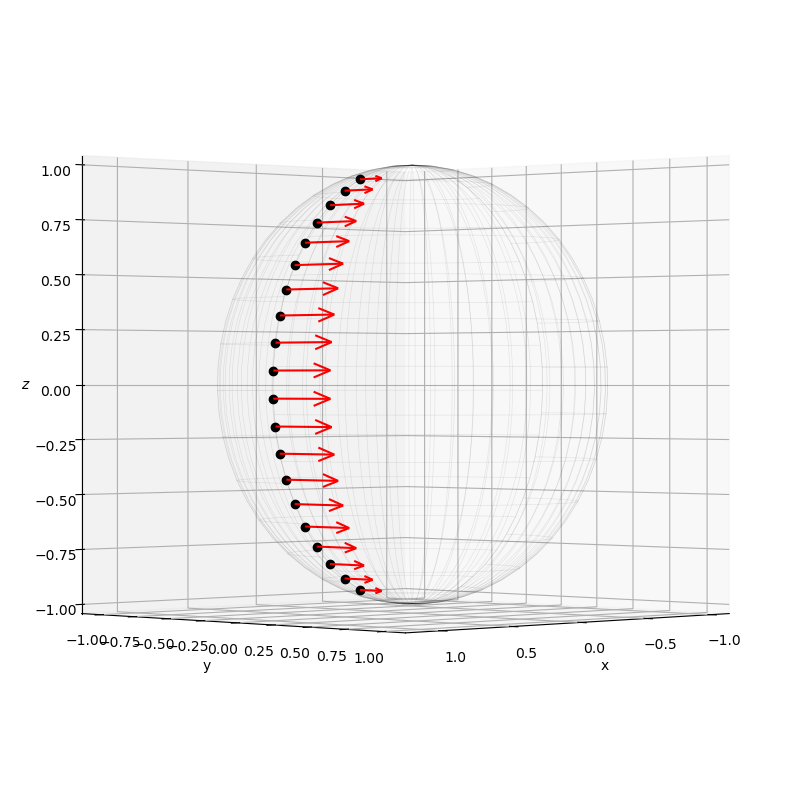

In [142]:
plt.close()
frames = 120

# We add a subplot to the figure which we tell to use the 3d projection 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
# We set the scaling of the axis to equal
ax.set_aspect("equal") 
# Lastly we set the viewing angle from which we want to view our 3d scene.
ax.view_init(elev=0, azim=45, roll=0)

# Using numpy we make a grid that we use to plot the wireframe
theta_w, phi_w =  np.mgrid[0:2*np.pi : 60j ,0:np.pi : 60j]

# We set the radius of the wireframe sphere to 1 and calculate
# the cartesian coordinates
# r_w = 1
x_w = np.sin(theta_w) * np.cos(phi_w) #func_x(r_w, theta_w, phi_w)
y_w = np.sin(theta_w) * np.sin(phi_w) #func_y(r_w, theta_w, phi_w)
z_w = np.cos(theta_w) #func_z(r_w, theta_w, phi_w)

# # We plot the wireframe
ax.plot_wireframe(x_w,y_w,z_w, colors= [0,0,0,0.08], linewidths=[0.5])

plt.xlim(-1.1, 1.2)
plt.ylim(-1.1, 1.1)
ax.set_zlim(-1, 1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')


scale = 0.4
c_th_list = np.linspace(1/8*np.pi, 7/8*np.pi, 20)
dot = []
U_arrow = []

for i, c_th in enumerate(c_th_list):
    V0 = (0, 1.)

    V_th, V_ph = moveVecPhiDirection(V0[0], V0[1], lamb=0, c_th=c_th)
    L, V, B_th, B_ph = vectorInCart(V_th, V_ph, c_th, 0)
    
    
    idot, = ax.plot(L["x"], L["y"], L["z"], "o", label = "$\gamma_1$", color="black")
    dot.append(idot)
    
    U_arrow.append(\
                   ax.quiver(L["x"], L["y"], L["z"], scale*V["x"], scale*V["y"], scale*V["z"], color="red")#, length=scale)#, 
                  )

def update(frame):
    phi = (frame/frames)*10*sp.pi
    for i,c_th in enumerate(c_th_list):
        V_th, V_ph = moveVecPhiDirection(V0[0], V0[1], lamb=phi, c_th=c_th)  
        L, V, B_th, B_ph = vectorInCart(V_th, V_ph, c_th, phi)

        dot[i].set_data([L["x"]], [L["y"]])
        dot[i].set_3d_properties([L["z"]])
        
        global U_arrow
        U_arrow[i].remove()
        U_arrow[i] = ax.quiver(L["x"], L["y"], L["z"], scale*V["x"], scale*V["y"], scale*V["z"], color="red")#, length = scale)


ani = animation.FuncAnimation(fig=fig, func=update, frames=frames, interval=100)

# Lastly we add labels and a legend
plt.xlabel("x")
plt.ylabel("y")
#plt.legend()

plt.show()
#ani



# Parallel transport over lines of constant $\phi$

A curve in the $\theta$ direction on our 2-sphere looks like: 

$$\gamma^{\mu} = (1, \lambda, c_{\phi})$$

The curve has an r component of 1, since the sphere has a radius of 1. The curve will have a constant $\phi$ component of $c_{\phi}$, so it will stay on a line from south to north. The speed of the curve is then:

$$
\dot{\gamma}^{\mu} = (0, 1, 0)
$$

When we evaluate $\frac{\partial x^{\mu}}{\partial \lambda}$ over the curve $\gamma$ it reduces to:

$$
\frac{\partial x^{\mu}}{\partial \lambda} = \dot{\gamma}^{\mu} = (0, 1, 0)
$$

So the parallel transport equation reduces to:

$$
\frac{\partial V^{\alpha}}{\partial \lambda} \text{ } +
V^{\nu} \text{ } \Gamma^{\alpha}_{\nu \theta} \text{ }
= 0 
$$

And we can explicitely write the summation over $\nu$, giving:

$$
\frac{\partial V^{\alpha}}{\partial \lambda} \text{ } +
V^{\theta} \text{ } \Gamma^{\alpha}_{\theta \theta} \text{ } +
V^{\phi} \text{ } \Gamma^{\alpha}_{\phi \theta} \text{ }
= 0 
$$

This gives us two equations one for $\alpha$ is $\theta$ and one for $\phi$.

$$
\frac{\partial V^{\theta}}{\partial \lambda} \text{ } +
V^{\theta} \text{ } \Gamma^{\theta}_{\theta \theta} \text{ } +
V^{\phi} \text{ } \Gamma^{\theta}_{\phi \theta} \text{ }
= 0 
$$

$$
\frac{\partial V^{\phi}}{\partial \lambda} \text{ } +
V^{\theta} \text{ } \Gamma^{\phi}_{\theta \theta} \text{ } +
V^{\phi} \text{ } \Gamma^{\phi}_{\phi \theta} \text{ }
= 0 
$$

Filling in the Christoffel Symbols we get:

$$
\frac{\partial V^{\theta}}{\partial \lambda} \text{ }
= 0 
$$

$$
\frac{\partial V^{\phi}}{\partial \lambda} \text{ } +
V^{\phi} \text{ } \frac{1}{\tan(\theta(\lambda))}
= 0 
$$

The first equation is simple in that it tells us that $V^{\theta}$ is constant. The second equation we can write, using the equation for our curve, as:

$$
\frac{\partial V^{\phi}}{\partial \lambda} \text{ } =
- V^{\phi} \text{ } \frac{1}{\tan(\lambda)} 
$$

Lets make mathematicians angry and just rip appart the differential :) Thus, rearranging gives us:

$$
\frac{\partial V^{\phi}}{V^{\phi}} \text{ } =
-  \text{ } \frac{1}{\tan(\lambda)} \partial \lambda
$$

The left side gives us a logarith: $\ln(1/V^{\phi})$. The right side we can do using sympy:

In [160]:
lamb = sp.symbols('\lambda')
sp.integrate(1/sp.tan(lamb), lamb)

So we have $\ln \left(\frac{V^{\phi}}{V^{\phi}_0} \right) = -\ln \left(\frac{\sin(\lambda)}{\sin(\lambda_0)} \right)$, which gives us the following two solutions:

$$V^{\phi} = \frac{V^{\phi}_0 \sin(\lambda_0)}{\sin(\lambda)}$$

$$ V^{\theta} = V^{\theta}_0$$

In [48]:
def moveVecThetaDirection(V_0_th, V_0_phi, lamb0, lamb, c_ph):

    V_th = V_0_th
    V_ph = V_0_phi * sp.sin(lamb0)/sp.sin(lamb)
    
    return V_th, float(V_ph)
    

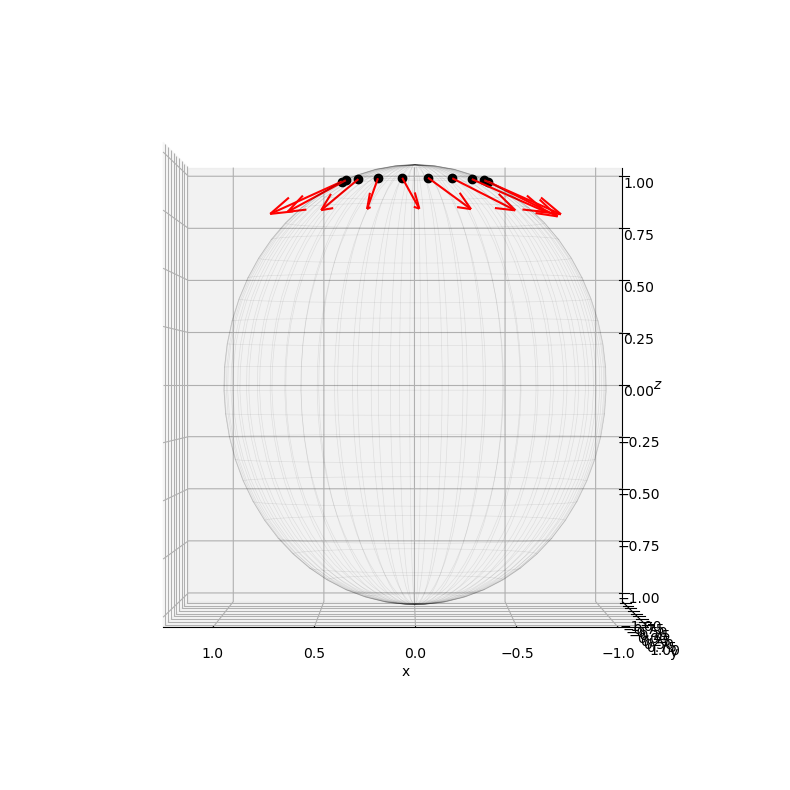

In [141]:
plt.close()
frames = 120

# We add a subplot to the figure which we tell to use the 3d projection 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
# We set the scaling of the axis to equal
ax.set_aspect("equal") 
# Lastly we set the viewing angle from which we want to view our 3d scene.
ax.view_init(elev=0, azim=90, roll=0)

# Using numpy we make a grid that we use to plot the wireframe
theta_w, phi_w =  np.mgrid[0:2*np.pi : 60j ,0:np.pi : 60j]

# We set the radius of the wireframe sphere to 1 and calculate
# the cartesian coordinates
# r_w = 1
x_w = np.sin(theta_w) * np.cos(phi_w) #func_x(r_w, theta_w, phi_w)
y_w = np.sin(theta_w) * np.sin(phi_w) #func_y(r_w, theta_w, phi_w)
z_w = np.cos(theta_w) #func_z(r_w, theta_w, phi_w)

# # We plot the wireframe
ax.plot_wireframe(x_w,y_w,z_w, colors= [0,0,0,0.08], linewidths=[0.5])

plt.xlim(-1.1, 1.2)
plt.ylim(-1.1, 1.1)
ax.set_zlim(-1, 1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')


scale = 0.4
c_ph_list = np.linspace(0, np.pi, 10)#1/8*np.pi, 7/8*np.pi, 10)
dot = []
U_arrow = []

for i, c_ph in enumerate(c_ph_list):
    V0 = (1., 1.)

    V_th, V_ph = moveVecThetaDirection(V0[0], V0[1], lamb0=1/8*sp.pi, lamb=1/8*sp.pi, c_ph=c_ph)
        #moveVecPhiDirection(, lamb=0, c_th=c_th)
    L, V, B_th, B_ph = vectorInCart(V_th, V_ph, 1/8*sp.pi, c_ph)
    
    
    idot, = ax.plot(L["x"], L["y"], L["z"], "o", label = "$\gamma_1$", color="black")
    dot.append(idot)
    
    U_arrow.append(\
                   ax.quiver(L["x"], L["y"], L["z"], scale*V["x"], scale*V["y"], scale*V["z"], color="red")#, length=scale)#, 
                  )

def update(frame):
    th = 1/8*np.pi + (frame/frames)*7/8*sp.pi
    for i,c_ph in enumerate(c_ph_list):
        V_th, V_ph = moveVecThetaDirection(V0[0], V0[1], lamb0=1/8*sp.pi, lamb=th, c_ph=c_ph)
        #moveVecPhiDirection(V0[0], V0[1], lamb=phi, c_th=c_th) 
        L, V, B_th, B_ph = vectorInCart(V_th, V_ph, th, c_ph)
        #L, V, B_th, B_ph = vectorInCart(V_th, V_ph, c_th, phi)

        dot[i].set_data([L["x"]], [L["y"]])
        dot[i].set_3d_properties([L["z"]])
        
        global U_arrow
        U_arrow[i].remove()
        U_arrow[i] = ax.quiver(L["x"], L["y"], L["z"], scale*V["x"], scale*V["y"], scale*V["z"], color="red")#, length = scale)


ani = animation.FuncAnimation(fig=fig, func=update, frames=frames, interval=100)

# Lastly we add labels and a legend
plt.xlabel("x")
plt.ylabel("y")
#plt.legend()

plt.show()
#ani



# Parallel Transport over a loop

We will parallel transport a vector with initial components $V_{0}$. We will transport it in a loop that is made out of four parts, each moving in either $\theta$ or the $\phi$ direction, keeping the other constant. This way we can use the functions we made: moveVecThetaDirection and moveVecPhiDirection. We make four such loop each going closer and closer to the north pole.

In [150]:
data_points = []
steps_per_side = 15 # we calculate 15 points in each side of the curve

# We make four loops and theta goes to smaller and smaller values at each.
for th_to_go_to in [1/2.5*np.pi, 1/3*np.pi, 1/8*np.pi, 1/100*np.pi]:
    # We take an intial vector with only a theta component
    V_0_th, V_0_phi = 1, 0
    data_points.append((1/2*np.pi, 0, V_0_th, V_0_phi))
    
    # For the first part of the loop we move in the Theta direction, up to the north pole
    th_list = np.linspace(float(1/2*np.pi), th_to_go_to, steps_per_side)
    for th in th_list:
        Vth1, Vph1 = moveVecThetaDirection(V_0_th, V_0_phi, lamb0=1/2*sp.pi, lamb=th, c_ph=0)
        data_points.append((th, 0, Vth1, Vph1))

    # The second part of the curve moves in the phi direction towards the east
    ph_list = np.linspace(0, 1/2*np.pi, steps_per_side)
    for ph in ph_list:
        Vth2, Vph2 = moveVecPhiDirection(Vth1, Vph1, lamb=ph, c_th=th_to_go_to)
        data_points.append((th_to_go_to, ph, Vth2, Vph2))

    # The third part of the curve moves in the theta direction back down to the equator
    th_list = np.linspace(th_to_go_to, float(1/2*np.pi), steps_per_side)
    for th in th_list:
        Vth3, Vph3 = moveVecThetaDirection(Vth2, Vph2, lamb0=th_to_go_to, lamb=th, c_ph=1/2*sp.pi)
        data_points.append((th, 1/2*np.pi, Vth3, Vph3))
    
    # The fourth and last part of the curve moves westwards back to the starting position
    ph_list = np.linspace(0, -1/2*np.pi, steps_per_side)
    for ph in ph_list:
        Vth4, Vph4 = moveVecPhiDirection(Vth3, Vph3, lamb=ph, c_th=1/2*sp.pi)
        data_points.append((1/2*np.pi, ph+1/2*np.pi, Vth3, Vph3))
    
    # We add some extra data points to keep the vector still at the end of the animation
    # so that you can clearly see how it differs from the how it started
    for i in range(steps_per_side):
        data_points.append((1/2*np.pi, ph+1/2*np.pi, Vth3, Vph3))

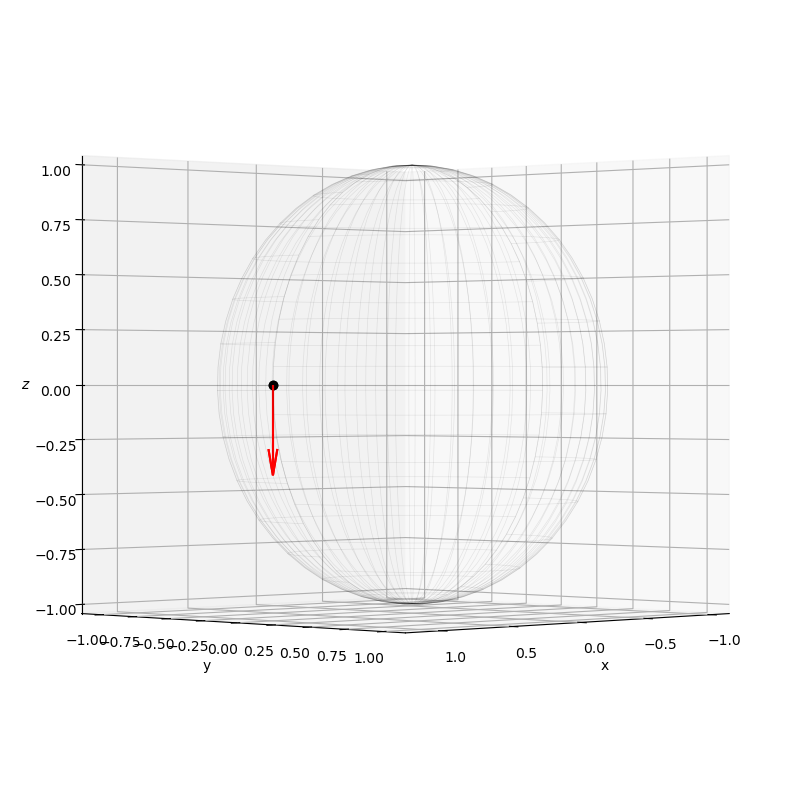

MovieWriter ffmpeg unavailable; using Pillow instead.


In [149]:
plt.close()
frames = len(data_points)

# We add a subplot to the figure which we tell to use the 3d projection 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
# We set the scaling of the axis to equal
ax.set_aspect("equal") 
# Lastly we set the viewing angle from which we want to view our 3d scene.
ax.view_init(elev=0, azim=45, roll=0)

# Using numpy we make a grid that we use to plot the wireframe
theta_w, phi_w =  np.mgrid[0:2*np.pi : 60j ,0:np.pi : 60j]

# We set the radius of the wireframe sphere to 1 and calculate
# the cartesian coordinates
# r_w = 1
x_w = np.sin(theta_w) * np.cos(phi_w) #func_x(r_w, theta_w, phi_w)
y_w = np.sin(theta_w) * np.sin(phi_w) #func_y(r_w, theta_w, phi_w)
z_w = np.cos(theta_w) #func_z(r_w, theta_w, phi_w)

# # We plot the wireframe
ax.plot_wireframe(x_w,y_w,z_w, colors= [0,0,0,0.08], linewidths=[0.5])

plt.xlim(-1.1, 1.2)
plt.ylim(-1.1, 1.1)
ax.set_zlim(-1, 1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

d = data_points[0]
L, V, B_th, B_ph = vectorInCart(d[2], d[3], d[0], d[1])    
dot_ref, = plt.plot(L["x"], L["y"], L["z"], "o", label = "$\gamma_1$", color="black")
dot, = plt.plot(L["x"], L["y"], L["z"], "o", label = "$\gamma_1$", color="black")
arrow_ref = plt.quiver(L["x"], L["y"], L["z"], scale*V["x"], scale*V["y"], scale*V["z"], color="red")
arrow = plt.quiver(L["x"], L["y"], L["z"], scale*V["x"], scale*V["y"], scale*V["z"], color="red")

#iframe = 0
def update(frame):
    d = data_points[frame]
    L, V, B_th, B_ph = vectorInCart(d[2], d[3], d[0], d[1])    
    #plt.plot(L["x"], L["y"], L["z"], "o", label = "$\gamma_1$", color="black")
    #plt.quiver(L["x"], L["y"], L["z"], scale*V["x"], scale*V["y"], scale*V["z"], color="red")
    
    dot.set_data([L["x"]], [L["y"]])
    dot.set_3d_properties([L["z"]])
    
    #iframe += 1

    global arrow
    arrow.remove()
    arrow = ax.quiver(L["x"], L["y"], L["z"], scale*V["x"], scale*V["y"], scale*V["z"], color="red")#, length = scale)


ani = animation.FuncAnimation(fig=fig, func=update, frames=frames, interval=100)

# Lastly we add labels and a legend
plt.xlabel("x")
plt.ylabel("y")
#plt.legend()

plt.show()
ani.save("parallel_transport.gif")
#ani



# The end

# NOTES AND SCRIBBLES

1 1.4142135623730951
1.3400347762530198 -0.6392289080329817
1.3400347762530198 -0.4520030956005933
1.3400347762530198 -0.4520030956005933


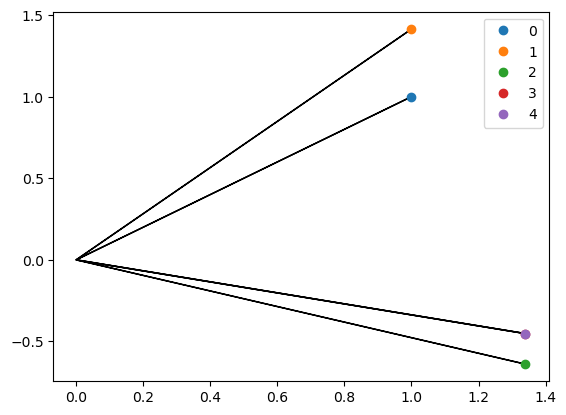

In [68]:
c1_start, c1_end = (1/2*sp.pi, 0), (1/4*sp.pi, 0)
c2_start, c2_end = (1/4*sp.pi, 0), (1/4*sp.pi, 1/2*sp.pi)
c3_start, c3_end = (1/4*sp.pi, 1/2*sp.pi), (1/2*sp.pi, 1/2*sp.pi)
c4_start, c4_end = (1/2*sp.pi, 1/2*sp.pi), (1/2*sp.pi, 0)

V_0_th, V_0_phi = 1, 1
plt.plot(V_0_th, V_0_phi, "o", label="0")
plt.arrow(0, 0, V_0_th, V_0_phi)
Vth_1, Vph_1 = moveVecThetaDirection(V_0_th, V_0_phi, lamb0=c1_start[0], lamb=c1_end[0], c_ph=c1_start[1])
print(Vth_1, Vph_1)
plt.plot(Vth_1, Vph_1, "o", label="1")
plt.arrow(0, 0, Vth_1, Vph_1)
Vth_2, Vph_2 = moveVecPhiDirection(Vth_1, Vph_1, lamb=c2_end[1]-c2_start[1], c_th=c2_start[0])
print(Vth_2, Vph_2)
plt.plot(Vth_2, Vph_2, "o", label="2")
plt.arrow(0, 0, Vth_2, Vph_2)
Vth_3, Vph_3 = moveVecThetaDirection(Vth_2, Vph_2, lamb0=c3_start[0], lamb=c3_end[0], c_ph=c3_end[1])
print(Vth_3, Vph_3)
plt.plot(Vth_3, Vph_3, "o", label="3")
plt.arrow(0, 0, Vth_3, Vph_3)
Vth_4, Vph_4 = moveVecPhiDirection(Vth_3, Vph_3, lamb=c4_end[1]-c4_start[1], c_th=c4_start[0])
print(Vth_4, Vph_4)
plt.plot(Vth_4, Vph_4, "o", label="4")
plt.arrow(0, 0, Vth_4, Vph_4)

plt.legend()

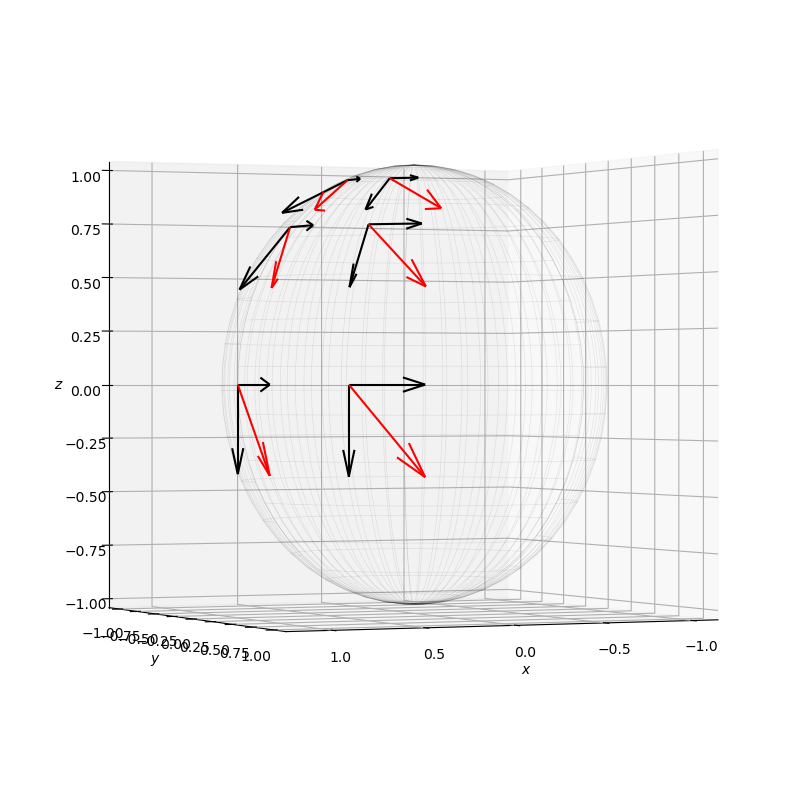

In [173]:
plt.close()
# We add a subplot to the figure which we tell to use the 3d projection 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
# We set the scaling of the axis to equal
ax.set_aspect("equal") 
# Lastly we set the viewing angle from which we want to view our 3d scene.
ax.view_init(elev=0, azim=65, roll=0)

# Using numpy we make a grid that we use to plot the wireframe
theta_w, phi_w =  np.mgrid[0:2*np.pi : 60j ,0:np.pi : 60j]

# We set the radius of the wireframe sphere to 1 and calculate
# the cartesian coordinates
# r_w = 1
x_w = np.sin(theta_w) * np.cos(phi_w) #func_x(r_w, theta_w, phi_w)
y_w = np.sin(theta_w) * np.sin(phi_w) #func_y(r_w, theta_w, phi_w)
z_w = np.cos(theta_w) #func_z(r_w, theta_w, phi_w)

# # We plot the wireframe
ax.plot_wireframe(x_w,y_w,z_w, colors= [0,0,0,0.08], linewidths=[0.5])

plt.xlim(-1.1, 1.2)
plt.ylim(-1.1, 1.1)
ax.set_zlim(-1, 1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

# We will plot the theta and phi basis vectors at three positions
th_phi_coords = [(1/2*sp.pi, 0), (1/4*sp.pi, 0), (1/8*sp.pi, 0), \
                 (1/2*sp.pi, 1/4*sp.pi), (1/4*sp.pi, 1/4*sp.pi), (1/8*sp.pi, 1/4*sp.pi), \
                 #(1/4 * sp.pi, 0), (1/4 * sp.pi, 1/4*sp.pi), (1/4 * sp.pi, 1/3*sp.pi), (1/4 * sp.pi, 1/2*sp.pi)\
                ]
V0 = (1.,1.)
#V = [(1/2*sp.pi, 0), (1/3*sp.pi, 0), (1/6*sp.pi, 0)]
#for v in V:
for th, phi in th_phi_coords:
    V_th, V_ph = moveVecThetaDirection(V0[0], V0[1], lamb=th, c_ph=phi)
    
    # def vectorInCart(comp_th, comp_ph, coord_th, coord_ph)
    L, V, B_th, B_ph = vectorInCart(V_th, V_ph, th, phi)
    # We plot the two basis vectors using a quiver
    scale = 0.4
    d_th_arrow = ax.quiver(L["x"], L["y"], L["z"], scale*B_th["x"], scale*B_th["y"], scale*B_th["z"], color="black")
    d_ph_arrow = ax.quiver(L["x"], L["y"], L["z"], scale*B_ph["x"], scale*B_ph["y"], scale*B_ph["z"], color="black")
    d_ph_arrow = ax.quiver(L["x"], L["y"], L["z"], scale*V["x"], scale*V["y"], scale*V["z"], color="red")


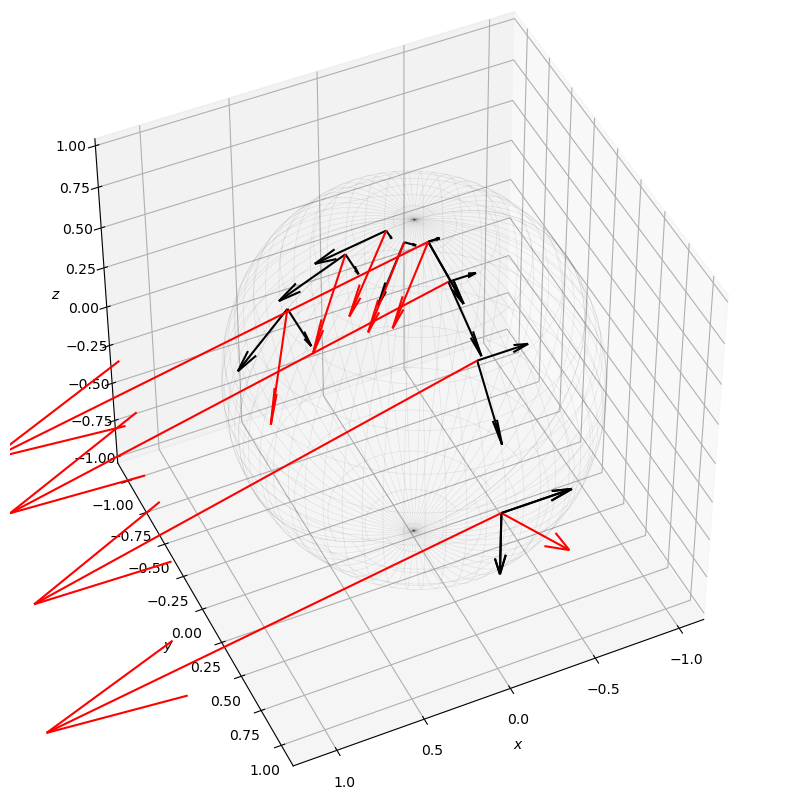

In [200]:
plt.close()
# We add a subplot to the figure which we tell to use the 3d projection 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
# We set the scaling of the axis to equal
ax.set_aspect("equal") 
# Lastly we set the viewing angle from which we want to view our 3d scene.
ax.view_init(elev=45, azim=65, roll=0)

# Using numpy we make a grid that we use to plot the wireframe
theta_w, phi_w =  np.mgrid[0:2*np.pi : 60j ,0:np.pi : 60j]

# We set the radius of the wireframe sphere to 1 and calculate
# the cartesian coordinates
# r_w = 1
x_w = np.sin(theta_w) * np.cos(phi_w) #func_x(r_w, theta_w, phi_w)
y_w = np.sin(theta_w) * np.sin(phi_w) #func_y(r_w, theta_w, phi_w)
z_w = np.cos(theta_w) #func_z(r_w, theta_w, phi_w)

# # We plot the wireframe
ax.plot_wireframe(x_w,y_w,z_w, colors= [0,0,0,0.08], linewidths=[0.5])

plt.xlim(-1.1, 1.2)
plt.ylim(-1.1, 1.1)
ax.set_zlim(-1, 1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')


V0 = (1.,1.)
L, V, B_th, B_ph = vectorInCart(V0[0], V0[1], th, phi)
scale = 0.4
d_th_arrow = ax.quiver(L["x"], L["y"], L["z"], scale*B_th["x"], scale*B_th["y"], scale*B_th["z"], color="black")
d_ph_arrow = ax.quiver(L["x"], L["y"], L["z"], scale*B_ph["x"], scale*B_ph["y"], scale*B_ph["z"], color="black")
d_ph_arrow = ax.quiver(L["x"], L["y"], L["z"], scale*V["x"], scale*V["y"], scale*V["z"], color="red")
#########################
## MOVE IT UP IN THETA ##
#########################
phi = 0
th_list = [1/4*sp.pi, 1/8*sp.pi, 1/20*sp.pi]#1/2*sp.pi, 
for th in th_list:
    V_th, V_ph = moveVecThetaDirection(V0[0], V0[1], lamb=th, c_ph=phi)
    
    # def vectorInCart(comp_th, comp_ph, coord_th, coord_ph)
    L, V, B_th, B_ph = vectorInCart(V_th, V_ph, th, phi)
    # We plot the two basis vectors using a quiver
    scale = 0.4
    d_th_arrow = ax.quiver(L["x"], L["y"], L["z"], scale*B_th["x"], scale*B_th["y"], scale*B_th["z"], color="black")
    d_ph_arrow = ax.quiver(L["x"], L["y"], L["z"], scale*B_ph["x"], scale*B_ph["y"], scale*B_ph["z"], color="black")
    d_ph_arrow = ax.quiver(L["x"], L["y"], L["z"], scale*V["x"], scale*V["y"], scale*V["z"], color="red")

V0 = (V_th, V_ph)
#########################
## MOVE IT RIGHT IN PHI ##
#########################
phi_list = [1/4*sp.pi, 1/2*sp.pi]
th = 1/20*sp.pi
for phi in phi_list:
    V_th, V_ph = moveVecPhiDirection(V0[0], V0[1], lamb=phi, c_th=th)
    
    # def vectorInCart(comp_th, comp_ph, coord_th, coord_ph)
    L, V, B_th, B_ph = vectorInCart(V_th, V_ph, th, phi)
    # We plot the two basis vectors using a quiver
    scale = 0.4
    d_th_arrow = ax.quiver(L["x"], L["y"], L["z"], scale*B_th["x"], scale*B_th["y"], scale*B_th["z"], color="black")
    d_ph_arrow = ax.quiver(L["x"], L["y"], L["z"], scale*B_ph["x"], scale*B_ph["y"], scale*B_ph["z"], color="black")
    d_ph_arrow = ax.quiver(L["x"], L["y"], L["z"], scale*V["x"], scale*V["y"], scale*V["z"], color="red")
V0 = (V_th, V_ph)

#########################
## MOVE IT DOWN IN THETA ##
#########################
phi = 1/2*sp.pi
th_list = [1/20*sp.pi, 1/8*sp.pi, 1/4*sp.pi, 1/2*sp.pi ]

for th in th_list:
    V_th, V_ph = moveVecThetaDirection(V0[0], V0[1], lamb=th, c_ph=phi)
    
    # def vectorInCart(comp_th, comp_ph, coord_th, coord_ph)
    L, V, B_th, B_ph = vectorInCart(V_th, V_ph, th, phi)
    # We plot the two basis vectors using a quiver
    scale = 0.4
    d_th_arrow = ax.quiver(L["x"], L["y"], L["z"], scale*B_th["x"], scale*B_th["y"], scale*B_th["z"], color="black")
    d_ph_arrow = ax.quiver(L["x"], L["y"], L["z"], scale*B_ph["x"], scale*B_ph["y"], scale*B_ph["z"], color="black")
    d_ph_arrow = ax.quiver(L["x"], L["y"], L["z"], scale*V["x"], scale*V["y"], scale*V["z"], color="red")

V0 = (V_th, V_ph)

In [ ]:
# We will plot the theta and phi basis vectors at three positions
th_phi_coords = [(1/2*sp.pi, 0), (1/2*sp.pi, 1/4*sp.pi), \
                 (1/4 * sp.pi, 0), (1/4 * sp.pi, 1/4*sp.pi), (1/4 * sp.pi, 1/3*sp.pi), (1/4 * sp.pi, 1/2*sp.pi) ]
V0 = (1.,1.)
#V = [(1/2*sp.pi, 0), (1/3*sp.pi, 0), (1/6*sp.pi, 0)]
#for v in V:
for th, phi in th_phi_coords:
    
    V_th, V_ph = moveVecPhiDirection(V0[0], V0[1], lamb=phi, c_th=th)
    
    # def vectorInCart(comp_th, comp_ph, coord_th, coord_ph)
    L, V, B_th, B_ph = vectorInCart(V_th, V_ph, th, phi)
#     # We plot the two basis vectors using a quiver
    scale = 0.4
    d_th_arrow = ax.quiver(L["x"], L["y"], L["z"], scale*B_th["x"], scale*B_th["y"], scale*B_th["z"], color="black")
    d_ph_arrow = ax.quiver(L["x"], L["y"], L["z"], scale*B_ph["x"], scale*B_ph["y"], scale*B_ph["z"], color="black")
    d_ph_arrow = ax.quiver(L["x"], L["y"], L["z"], scale*V["x"], scale*V["y"], scale*V["z"], color="red")

Lets use sympy for a bit of fun. We write $V_{\phi}$ as a symbol:

In [48]:
V_ph = sp.symbols('V_ph')

In [ ]:
The we integrate the left side

In [49]:
sp.integrate(-dx_dph.diff(th)/ dx_dph, th)

In [50]:
sp.integrate(1/V_ph)

In [51]:
sp.solve(sp.integrate(1/V_ph) + sp.integrate(dx_dph.diff(th)/ dx_dph, th), V_ph)

$$V^{\theta}(0) = V^{\theta}_0$$
$$V^{\phi}(0) = V^{\phi}_0$$

A curve in the $\theta$ direction on our 2-sphere looks like: $\gamma^{\mu} = (1, \lambda, c_{\phi})$. The curve has an r component of 1, since the sphere has a radius of 1. The curve will have a $\phi$ component of 0, so it wil stay on a line from the south to the north pole (it will stay on a longitude). The speed of the curve is then:

$$
\frac{\partial x^{\mu}}{\partial \lambda} = (0, 1, 0)
$$

And thus it has unit speed. Now lets start on the equator and lets transport a vector: $\vec{V}_0 = (0, V^{\theta}_0, V^{\phi}_0)$. Lets start working out the parallel transport equation:

$$
\frac{\partial V^{\alpha}}{\partial \lambda} \text{ } +
\frac{\partial x^{\mu}}{\partial \lambda} \text{ } V^{\nu} \text{ } \Gamma^{\alpha}_{\nu \mu}
= 0 
$$

The first term we can rewrite using our choise of curve:

$$
\frac{\partial V^{\alpha}}{\partial \lambda} \text{ } = 
\frac{\partial x^{\beta}}{\partial \lambda} \text{ } \frac{\partial V^{\alpha}}{\partial x^{\beta}} =
U^{\beta} \text{ } \frac{\partial V^{\alpha}}{\partial x^{\beta}}  = 
\frac{\partial V^{\alpha}}{\partial \theta}
$$

And also the second term we can write more simple using our curve:

$$
\frac{\partial x^{\mu}}{\partial \lambda} \text{ } V^{\nu} \text{ } \Gamma^{\alpha}_{\nu \mu} \text{ } = 
V^{\nu} \text{ } \Gamma^{\alpha}_{\nu \theta} \text{ } = 
V^{\theta} \text{ } \Gamma^{\alpha}_{\theta \theta} \text{ } + V^{\phi} \text{ } \Gamma^{\alpha}_{\phi \theta} \text{ }
$$

Combining both terms again:

$$
\frac{\partial V^{\alpha}}{\partial \theta} + 
V^{\theta} \text{ } \Gamma^{\alpha}_{\theta \theta} \text{ } + 
V^{\phi} \text{ } \Gamma^{\alpha}_{\phi \theta} \text{ }
= 0
$$

In [47]:
comp = "th"
D = sp.symbols('D', positive = True)
sp.expand_trig(sp.Matrix([[gam(comp, "th", "th"), gam(comp, "th", "ph")], [gam(comp, "ph", "th"), gam(comp, "ph", "ph")]]).subs(sp.sin(th), D))

⎡0             0            ⎤
⎢                           ⎥
⎣0  -sin(\theta)⋅cos(\theta)⎦

$$
\frac{\partial V^{\theta}}{\partial \theta}
= 0
$$

In [45]:
comp = "ph"
sp.Matrix([[gam(comp, "th", "th"), gam(comp, "th", "ph")], [gam(comp, "ph", "th"), gam(comp, "ph", "ph")]])

⎡                  1     ⎤
⎢     0       ───────────⎥
⎢             tan(\theta)⎥
⎢                        ⎥
⎢     1                  ⎥
⎢───────────       0     ⎥
⎣tan(\theta)             ⎦

$$
\frac{\partial V^{\phi}}{\partial \theta} + 
V^{\phi} \text{ } \frac{1}{\tan(\theta)} \text{ }
= 0
$$

In [48]:
V_ph = sp.symbols('V_ph')

In [49]:
sp.integrate(-dx_dph.diff(th)/ dx_dph, th)

In [50]:
sp.integrate(1/V_ph)

In [51]:
sp.solve(sp.integrate(1/V_ph) + sp.integrate(dx_dph.diff(th)/ dx_dph, th), V_ph)

And we find that the solution must be:
$$V^{\phi}(\theta) = V^{\phi}_0 \text{ } \frac{1}{\mathrm{sin(\theta)}}
$$

Thus when parallel transported in the $\theta$-direction, our vector $\vec{V}$ has the following components over the curve we have choosen:

$$
\vec{V}_{\theta\text{-direction}}(\theta, \phi) = \begin{bmatrix}
V^{\theta}_0\\
V^{\phi}_0 \text{ } \frac{1}{\mathrm{sin(\theta)}}
\end{bmatrix}
$$